# Le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle

Dans le cadre de cette exercice évalué par les pairs (Mooc RR, mod3) j'ai choisi le sujet n°2 intitulé :
**Le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle**

## Contexte de l'étude

William Playfair un des pionnier de la représentation graphique des données, a réalisé un graphique montrant l'évolution du prix du blé et du salaire moyen entre 1565 et 1821. Ce graphique a été publié en 1822 dans son livre *A Letter on our Agricultural Distresses, Their Causes and Remedies*. Ci-dessous une reproduction hébergée sur [Wikipédia][graph original].

![Chart Showing at One View the Price of the Quarter of Wheat, and Wages of Labour by the Week, from 1565 to 1821](playfair_ori_prixble_salaire.png)

[graph original]:https://fr.wikipedia.org/wiki/William_Playfair#/media/File:Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat,_and_Wages_of_Labour_by_the_Week,_from_1565_to_1821.png

Le premier objectif de l'étude est de reproduire ce graphe, puis dans un second temps de corriger le graphique. En effet W. Playfair a utilisé la même unité pour représenter deux quantités différentes sur l'axe des ordonnées. Enfin dans un troisième temps le but sera d'améliorer la représentation du pouvoir d'achat des agriculteurs anglais sur cette période.

## Les données

### Sources

Au contraire du descriptif du sujet, j'ai été en mesure de retrouver certaines données numériques originale. W. Playfair a bien publié certaines données numériques de son étude. Dans la copie numérique de son livre, disponible [ici][playfair book], p. 40 on trouve des fragments du graphique qui nous intéresse ici, puis p. 48 le tableau du calcul du prix moyen du Boisseau de blé par tranche de 5 ans. Cette information est importante, le prix du blé est moyenné sur 5 ans, à compter de la date à gauche de chaque barre du graphique original.

Mais je n'ai pas trouvé dans le manuscript le détail du calcul des salaires, il semble que le livre a été mal numérisé pour la partie annexe, ou que des pages sont manquantes.

Néanmoins une version numérisée des données du graphique est diponible [ici][data_url], réalisé par [Vincent Arel-Bundock] et publié sur son site [R datasets][vab r datasets].

[data_url]: https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv
[Vincent Arel-Bundock]: https://github.com/vincentarelbundock
[vab r datasets]: https://vincentarelbundock.github.io/Rdatasets/
[playfair book]: https://books.google.fr/books?id=aQZGAQAAMAAJ&printsec=frontcover&hl=fr&source=gbs_ge_summary_r&cad=0#v=onepage&q&f=false

In [1]:
# import des bibliothèques
import urllib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import listdir
%matplotlib inline

# import de fonctions spécifiques pour accès direct
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
# from matplotlib.dates import DateFormatter

In [2]:
# téléchargement du fichier
data_url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv'
filename = 'Wheat.csv'

curFiles = set(listdir())

# téléchargement automatique du fichier
# si non présent dans le répertoire
if not(filename in curFiles):
    print('Téléchargement du fichier')
    urllib.request.urlretrieve(data_url, filename)
else:
    print('Fichier déjà téléchargé')

listdir()

Fichier déjà téléchargé


['.ipynb_checkpoints',
 'exercice.ipynb',
 'exercice_en.ipynb',
 'exercice_en.Rmd',
 'exercice_fr.ipynb',
 'exercice_fr.Rmd',
 'exercice_python_en.org',
 'exercice_python_fr.org',
 'exercice_R_en.org',
 'exercice_R_fr.org',
 'playfair_ori_prixble_salaire.png',
 'playfair_purchpower.PNG',
 'Wheat.csv']

In [3]:
# lecture du fichier
rawdata = pd.read_csv(filename, index_col=0)

In [4]:
rawdata.head()

Year  Wheat  Wages
1  1565   41.0   5.00
2  1570   45.0   5.05
3  1575   42.0   5.08
4  1580   49.0   5.12
5  1585   41.5   5.15

### Vérification des données

Les données sont vérifiées sur les critères suivants :

* présence de lignes vides
* rupture de date, ou division non régulière

Il est à noter les données sont enregistrées tous les 5 ans (moyenne pour le prix du blé, pour les salaires ce n'est pas vérifié mais supposé).

In [5]:
# présence de lignes vides
rawdata[rawdata.isnull().any(axis=1)]

Year  Wheat  Wages
51  1815   78.0    NaN
52  1820   54.0    NaN
53  1821   54.0    NaN

Les 3 dernières lignes sont vides pour la colonne *Wages*, ce qui explique l'arrêt de la ligne rouge et de la surface bleue dans le graphique originale.

In [6]:
# rupture de date, ou division non régulière
print("Années de rupture :")
expect_delta = 5
for y1, y2 in zip(rawdata['Year'][:-1], rawdata['Year'][1:]):
    delta_y = y2 - y1
    if delta_y != expect_delta :
        print(y1)

Années de rupture :
1820


Seule l'année 1820 présente une rupture. En effet l'enregistrement suivant est 1821. Ce qui explique la barre moins large sur le graphique original, pour les années 1820 à 1821.

### Commentaire sur les unités

Pour rappel les untités originales des données sont les suivantes :
* Blé (Wheat) : Shillings pour un quart de boisseau (8,6 kg)
* Salaire (Wages) : Shillings par semaine

Avant 1971, la monnaie anglaise était découpée de la manière suivante :
* 1 Livre valait 20 shillings
* 1 Shilling valait 12 pences

## Reproduction du graphique original

Ci-dessous le graphique original est reproduit à l'aide de `Matplotlib`.
(Pour représenter des dégradés voir ce lien : https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/gradient_bar.html?highlight=gradient)

Les années 1820 et 1821 sont représentées séparémment du reste des données afin d'avoir une barre de largeur différente (voir le code ci-dessous). Les deux graphiques sont superposés par le biais de la méthode `twinx`.

Plus d'informations sur le placement des graduations, [exemple Matplotlib][mpl ticklocators].

[mpl ticklocators]: https://matplotlib.org/gallery/ticks_and_spines/tick-locators.html#sphx-glr-gallery-ticks-and-spines-tick-locators-py

Text(0.5, 1.0, 'Chart Showing at One View\nthe Price of the Quarter of Wheat, and Wages of Labour\nby the Week, from 1565 to 1821')

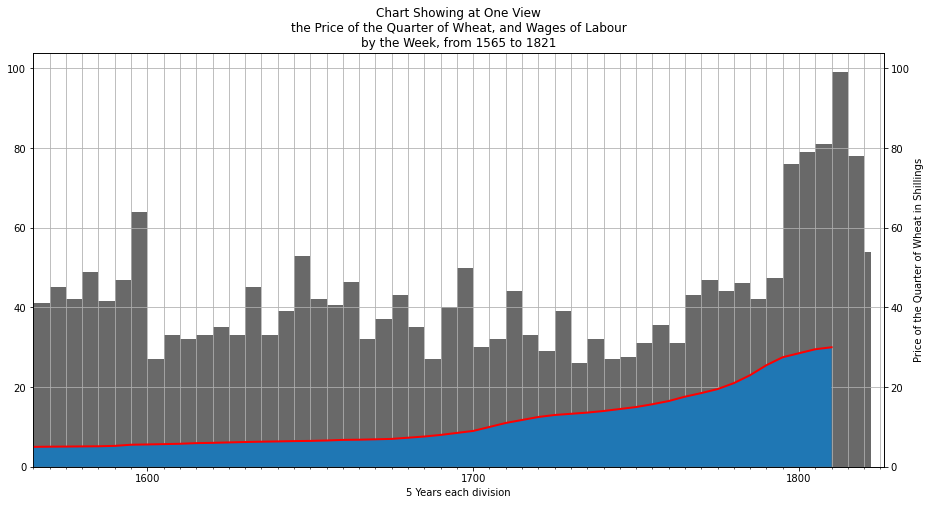

In [7]:
fig1, ax1 = plt.subplots(1,1)

fig1.set_size_inches(2.54*6, 2.54*3)

# === représentation du prix du blé === #
ax1.bar(rawdata['Year'][:-2], rawdata['Wheat'][:-2], align='edge', width=5, color='dimgrey')
# bar de largeur 1 année pour les deux années 1820 et 1821
ax1.bar(rawdata['Year'][-2:], rawdata['Wheat'][-2:], align='edge', width=1, color='dimgrey')

# graduation proche de l'original, avec les siècles comme majeure
# et une graduation mineure tous les 5 ans
# aide sur les ticks locator :
# https://matplotlib.org/gallery/ticks_and_spines/tick-locators.html#sphx-glr-gallery-ticks-and-spines-tick-locators-py
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(MultipleLocator(5))

ax1.grid(True, which='both')

# les marges de l'axe x sont diminuées
ax1.set_xlim([int(rawdata['Year'][0:1]), int(rawdata['Year'][-1:]+5)])

ax1.set_xlabel('5 Years each division')

# === représentation du salaire === #
# l'axe 2 partage l'axe x de l'axe 1
ax2 = ax1.twinx()
ax2.fill_between(rawdata['Year'], rawdata['Wages'])
ax2.plot(rawdata['Year'], rawdata['Wages'], 'r', linewidth=2)

# les deux axes ont les mêmes limites, pour reproduire l'original
myylim = ax1.get_ylim()
ax2.set_ylim(myylim)

ax2.set_ylabel('Price of the Quarter of Wheat in Shillings')

ax1.set_title("""Chart Showing at One View
the Price of the Quarter of Wheat, and Wages of Labour
by the Week, from 1565 to 1821""")

## Graphique avec deux axes des ordonnées
Le graphique précédent est repris et amélioré avec deux axes distincts cette fois-ci.
Le jeu de couleur est changé pour un affichage plus lisible.
La conversion vers l'unité moderne est ajouté en légende de l'axe y, pour information.

Text(0.5, 1.0, 'Chart Showing at One View\nthe Price of the Quarter of Wheat, and Wages of Labour\nby the Week, from 1565 to 1821')

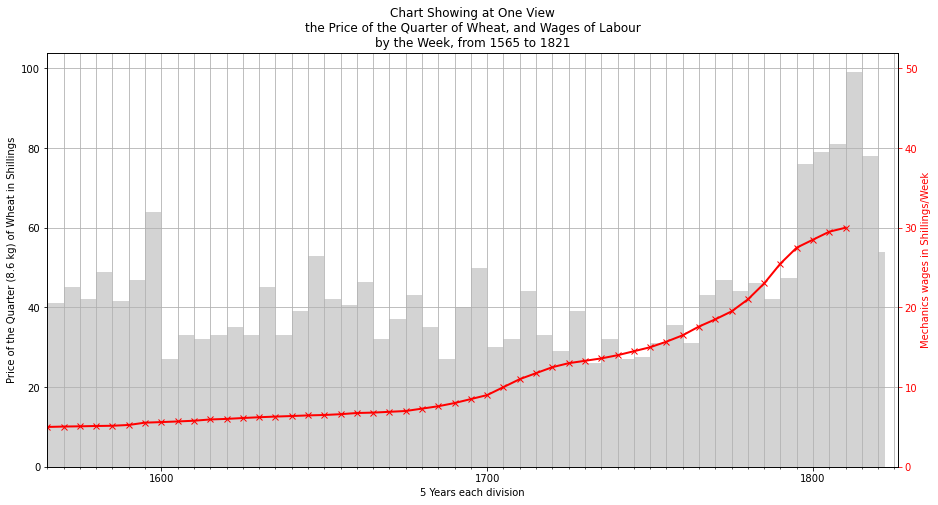

In [8]:
fig2, ax21 = plt.subplots(1,1)

fig2.set_size_inches(2.54*6, 2.54*3)

# === représentation du prix du blé === #
ax21.bar(rawdata['Year'][:-2], rawdata['Wheat'][:-2], align='edge', width=5, color='lightgrey')
ax21.bar(rawdata['Year'][-2:], rawdata['Wheat'][-2:], align='edge', width=1, color='lightgrey')

# graduation proche de l'original, avec les siècles comme majeure
# et une graduation mineure tous les 5 ans
ax21.xaxis.set_major_locator(MultipleLocator(100))
ax21.xaxis.set_minor_locator(MultipleLocator(5))
# grille
ax21.grid(True, which='both')

ax21.set_xlabel('5 Years each division')
ax21.set_ylabel('Price of the Quarter (8.6 kg) of Wheat in Shillings')

# les marges de l'axe x sont diminuées
ax21.set_xlim([int(rawdata['Year'][0:1]), int(rawdata['Year'][-1:]+5)])

# === représentation du salaire === #
# l'axe 2 partage l'axe x de l'axe 1
ax22 = ax21.twinx()
ax22.plot(rawdata['Year'], rawdata['Wages'], 'r', linewidth=2, marker='x')

# les deux axes ont des limites différentes pour montrer que les axes sont différents
myylim = ax21.get_ylim()
ax22.set_ylim([0,myylim[1]/2])

ax22.set_ylabel('Mechanics wages in Shillings/Week')
ax22.yaxis.label.set_color('r')
ax22.tick_params(axis='y', colors='r')

ax21.set_title("""Chart Showing at One View
the Price of the Quarter of Wheat, and Wages of Labour
by the Week, from 1565 to 1821""")


## Représentation du pouvoir d'achat

### Le pouvoir d'achat en équivalent blé acheté
Le pouvoir d'achat est défini ici comme la quantité de blé qu'un ouvrier peut acheter avec son salaire hebdomadaire. Soit $pp$ le pouvoir d'achat (*purchasing power*), défini comme dans l'équation suivante avec $p_w$ le prix du blé (*price of wheat) en Shillings par kg, et $w$ le salaire hebdomadaire (*wages*) en Shillings : 

$$ pp = \frac{s}{p_w} $$

Le prix du blé par boisseau est converti en prix du blé par kg pour une représentation plus moderne.
Le pouvoir d'achat sera donc exprimé en kg de blé par semaine.

Pour rappel, les années 1815, 1820, 1821 n'ont pas de salaire hebdomadaire renseigné. Ces lignes sont retirées pour le calcul du pouvoir d'achat.

In [9]:
# === on supprime les années sans salaires === #
print("lignes supprimées :")
print(rawdata[rawdata.isnull().any(axis=1)])
data = rawdata.dropna().copy()

# === facteurs de conversion === #
quarter_to_mass = 8.6  # in kg
shilling_to_pence = 12

converted_wheat = data['Wheat']/quarter_to_mass
purchasing_power = data['Wages']/converted_wheat
purchasing_power.head()

lignes supprimées :
    Year  Wheat  Wages
51  1815   78.0    NaN
52  1820   54.0    NaN
53  1821   54.0    NaN


1    1.048780
2    0.965111
3    1.040190
4    0.898612
5    1.067229
dtype: float64

Text(0.5, 1.0, "Pouvoir d'achat d'un ouvrier\n en équivalent masse de blé hebdomadaire\n de 1565 à 1810")

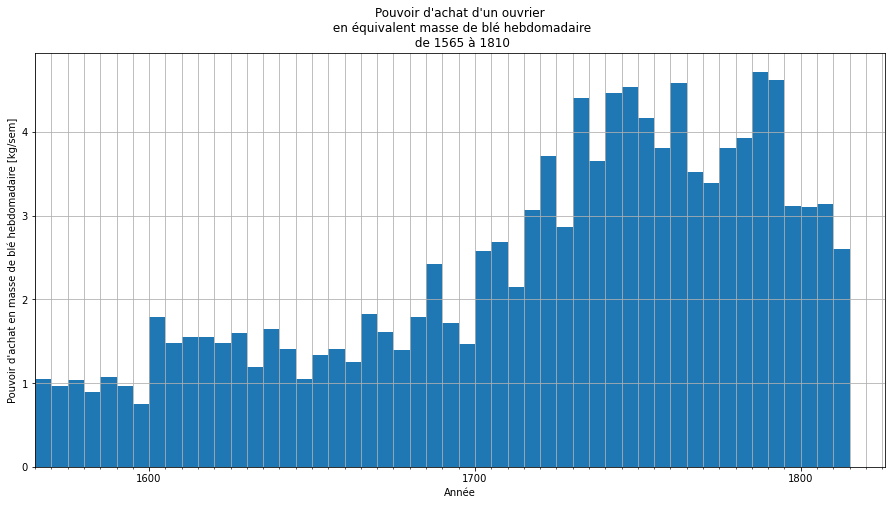

In [10]:
fig3, ax31 = plt.subplots(1,1)
fig3.set_size_inches(2.54*6, 2.54*3)

# affichage du pouvoir d'achat sous forme d'histogramme
ax31.bar(data['Year'], purchasing_power, align='edge', width=5)

# les mêmes limites que précédemment sont conservées pour comparaison
ax31.set_xlim([int(rawdata['Year'][0:1]), int(rawdata['Year'][-1:]+5)])

# graduation proche de l'original, avec les siècles comme majeure
# et une graduation mineure tous les 5 ans
ax31.xaxis.set_major_locator(MultipleLocator(100))
ax31.xaxis.set_minor_locator(MultipleLocator(5))

ax31.grid(True, which='both')

ax31.set_xlabel("Année")
ax31.set_ylabel("Pouvoir d'achat en masse de blé hebdomadaire [kg/sem]")

ax31.set_title("Pouvoir d'achat d'un ouvrier\n en équivalent masse de blé hebdomadaire\n de 1565 à 1810")

### Le pouvoir d'achat représenté différemment
Le pouvoir d'achat est ici représenté différemment, pour faire apparaître les variations des deux grandeurs qui ont servi à sa construction. Le prix du blé pour un quinquennat est représenté en fonction du salaire hebdomadaire pour ce même quinquennat. Les quinquennats sont représentées par une couleur.

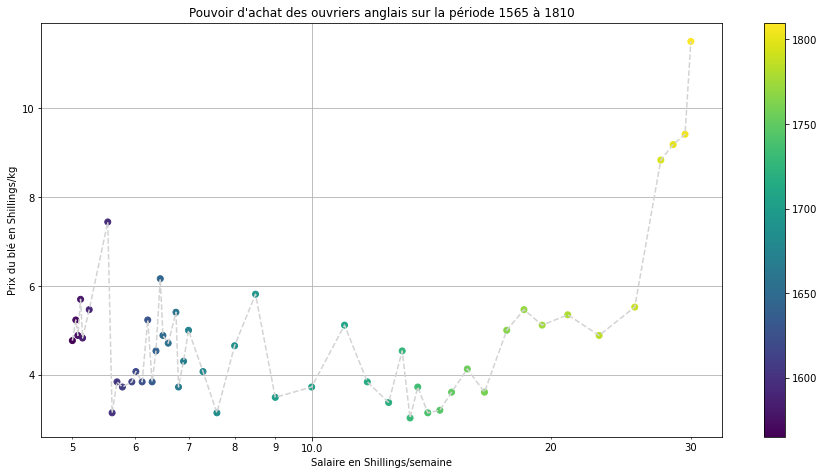

In [11]:
fig4, ax41 = plt.subplots(1,1)
fig4.set_size_inches(2.54*6, 2.54*3)

# ajout des marqueurs colorés en fonction de l'année
mypoints = ax41.scatter(data['Wages'], converted_wheat, c=data['Year'])
fig4.colorbar(mypoints)

# ajout d'une colonne vertébrale aux poitn pour aider à la lecture
ax41.plot(data['Wages'], converted_wheat, '--', color='lightgrey')

ax41.set_title("Pouvoir d'achat des ouvriers anglais sur la période 1565 à 1810")
ax41.set_xlabel("Salaire en Shillings/semaine")
ax41.set_ylabel("Prix du blé en Shillings/kg")
ax41.grid(True)
ax41.set_xscale('log')
ax41.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax41.xaxis.set_minor_formatter(ticker.ScalarFormatter())

Ce graphique permet de représenter le pouvoir d'achat de manière indirecte. 
L'axe des abscisses est de type logarithmique pour étaler un peu les valeurs basses de salaire. Mais comme on peut le voir ci-dessus, ce n'est pas lisible directement :

* Le pouvoir d'achat est le plus élevé dans le coin inférieur droite, et le plus faible dans le coin supérieur gauche (ce qui est assez contre-intuitif : les valeurs élevées sont attendues conventionnellement en haut à droite);
* de plus la variation entre les deux coins n'est pas linéaire puisque le pouvoir d'achat est le salaire divisé par le prix du blé;
* enfin l'évolution avec les années n'est pas vraiment visibles.

Si le but de la représentation est l'évolution du pouvoir d'achat alors cette représentation n'est pas adaptée. La représentation directe est plus claire, bien qu'il y ait une perte d'information par rapprot au prix du blé et au niveau de rémunération.

##  Représentation du pouvoir d'achat et des autres grandeurs sur le même graphique
Différentes représentations permettant de répondre aux problèmes relevés ci-dessus sont présentées ci après.

### Représentation du pouvoir d'achat avec une couleur

La représentation précédente est reprise, avec cette fois-ci la couleur des points qui indique le pouvoir d'achat. La représensation des années est réalisée avec des annotations. Afin de mieux comprendre l'évolution du pouvoir d'achat, des contours ont été ajoutés pour délimiter les zones colorés plus aisèment car le nombre de points reste faible.

Le calcul est réalisé sur le jeu de données original, [les `NaN` ne sont pris en compte dans l'affichage][mpl nan] avec `matplotlib`. Cela n'est pzs gênant dans notre cas, car aucun calcul n'est fait sur ces valeurs.

[mpl nan]: https://matplotlib.org/3.1.3/gallery/lines_bars_and_markers/nan_test.html

In [12]:
# === conversion de l'unité du prix, et ajout d'une colonne pouvoir d'achat === #
data_by_year = data.set_index('Year')
data_by_year['Wheat'] = data_by_year['Wheat']/quarter_to_mass
data_by_year['Purchpower'] = data_by_year['Wages']/data_by_year['Wheat']

# === préparation des données pour les contours === #
wheat_v = np.arange(2, 12)
wages_v = np.arange(4, 31)

# matrice de pouvoir d'achat
xx, yy = np.meshgrid(wages_v, wheat_v)
purchpower_mat = xx / yy


<bound method Axes.text of <matplotlib.axes._subplots.AxesSubplot object at 0x00000295D7282970>>

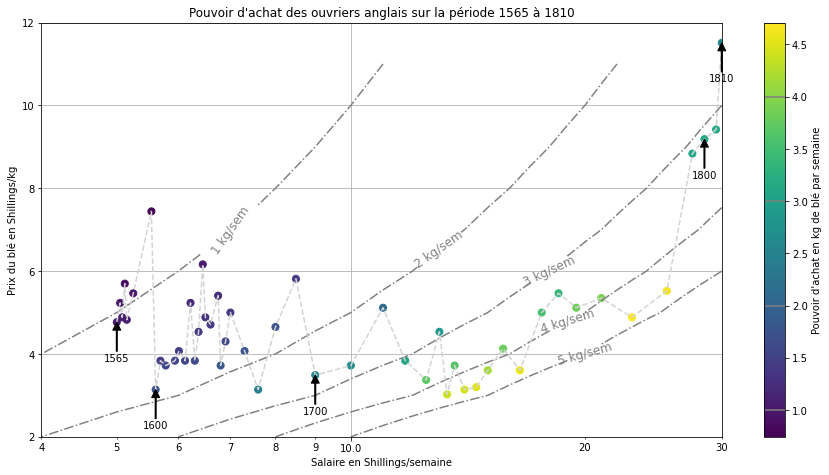

In [13]:
# === tracé de la figure === #
fig5, ax51 = plt.subplots(1,1)
fig5.set_size_inches(2.54*6, 2.54*3)

# tracé des contours de pouvoir d'achat
myCont = ax51.contour(xx, yy, purchpower_mat, linestyles='-.', colors='grey', levels=[1, 2, 3, 4,5])
ax51.clabel(myCont, inline=1, fontsize=12, fmt='%d kg/sem')

# ajout des marqueurs colorés en fonction du pouvoir d'achat
mypoints = ax51.scatter(data_by_year['Wages'], data_by_year['Wheat'], c=data_by_year['Purchpower'], s=50)
cbar = fig5.colorbar(mypoints)
cbar.add_lines(myCont)
cbar.ax.set_ylabel("Pouvoir d'achat en kg de blé par semaine")
# ajout d'une colonne vertébrale aux points pour aider à la lecture des années
ax51.plot(data_by_year['Wages'], data_by_year['Wheat'], '--', color='lightgrey')

ax51.grid(True)
ax51.set_xscale('log')
ax51.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax51.xaxis.set_minor_formatter(ticker.ScalarFormatter())

ax51.set_title("Pouvoir d'achat des ouvriers anglais sur la période 1565 à 1810")
ax51.set_xlabel("Salaire en Shillings/semaine")
ax51.set_ylabel("Prix du blé en Shillings/kg")

# annotation pour les années
date_label = [1565, 1600, 1700, 1800, 1810]

for year in date_label:
    curxy = (data_by_year.loc[year]['Wages'], data_by_year.loc[year]['Wheat'])
    curxy_txt = (data_by_year.loc[year]['Wages'], data_by_year.loc[year]['Wheat']-0.75)
    ax51.annotate(str(year), xy=curxy,  xycoords='data',
                xytext=curxy_txt, textcoords='data',
                arrowprops=dict(facecolor='black', width=1, headlength=8, headwidth=8),
                horizontalalignment='center', verticalalignment='top')
    
# faire un peu de place pour les date
ax51.set_ylim([2, 12])

ax51.text

Cette dernière figure est plus intéressante que la précédente, mais elle est chargée. De plus si l'information principale est l'évolution du pouvoir d'achat en fonction des années, cette figure rend l'interprétation complexe.
Cette figure est plutôt intéressante pour voir l'évolution du prix du blé et des salaires de manière précise. Mais la mise en relation de ces variables, a priori indépendantes, ne fait pas sens.

### Représentation du pouvoir d'achat directe

Pour la dernière itération de cette étude, le pouvoir d'achat est représentée directement en fonction des années. Et des informations secondaire et qualitatives sont données par la taille et la couleur des points pour les autres variables :

* le prix du blé est codé par une couleur
* le salaire est codé par la taille des points

Une ligne en marches d'escalier est utilisée pour relier les points et rappeler que les données sont moyennées sur 5 ans.

In [14]:
# === propriétés intéressantes === #
purchpower_min = data_by_year['Purchpower'].min()
purchpower_min_id = data_by_year['Purchpower'].idxmin()
purchpower_max = data_by_year['Purchpower'].max()
purchpower_max_id = data_by_year['Purchpower'].idxmax()
print("Pouvoir d'achat minimum de {} blé en kg/sem en {}".format(purchpower_min, purchpower_min_id))
print("Pouvoir d'achat maximum de {} blé en kg/sem en {}".format(purchpower_max, purchpower_max_id))

Pouvoir d'achat minimum de 0.7444375 blé en kg/sem en 1595
Pouvoir d'achat maximum de 4.70952380952381 blé en kg/sem en 1785


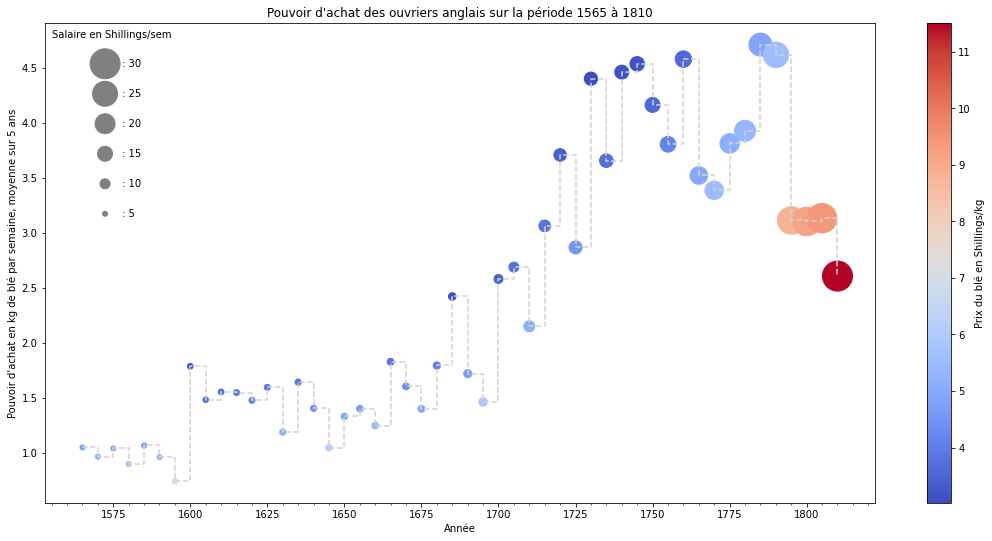

In [15]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# === tracé de la figure === #
fig6, ax61 = plt.subplots(1,1)
fig6.set_size_inches(2.54*6, 2.54*3)

# add a spine to scatter to ease reading of each year
#ax61.plot(data_by_year.index, data_by_year['Purchpower'], '--', color='lightgrey')
ax61.step(data_by_year.index, data_by_year['Purchpower'], linestyle='--', color='lightgrey', where='post', marker=None)

# main data scatter plot with size and color link with variables
myScat6 = ax61.scatter(data_by_year.index, data_by_year['Purchpower'], 
                       c=data_by_year['Wheat'], s=data_by_year['Wages']**2, cmap='coolwarm')
cbar = fig6.colorbar(myScat6)
cbar.ax.set_ylabel("Prix du blé en Shillings/kg")

ax61.set_title("Pouvoir d'achat des ouvriers anglais sur la période 1565 à 1810")
ax61.set_xlabel("Année")
ax61.set_ylabel("Pouvoir d'achat en kg de blé par semaine, moyenne sur 5 ans")

ax61.xaxis.set_major_locator(MultipleLocator(25))
ax61.xaxis.set_minor_locator(MultipleLocator(5))

# do it before inset ax, otherwise function messes up axes
plt.tight_layout()

# === wages legend = size of each circle === #
# add above all an inset axe (do it at the end otherwise, layout not compatible)
axins62 = inset_axes(ax61, width="15%", height="40%", loc=2)
# no visible axis
for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    axins62.axis[direction].set_visible(False)

wages_levels = np.arange(5, 35, 5)
wages_lx = np.ones(len(wages_levels))*0.5
axins62.scatter(wages_lx, wages_levels, s = wages_levels**2, color='grey')
axins62.set_xlim([0.1,1])
axins62.set_ylim([4, 36])
axins62.text(0.5,0.95,'Salaire en Shillings/sem', transform=axins62.transAxes, horizontalalignment='center')

for cur_wage in wages_levels:
    axins62.text(0.60, cur_wage, ' : ' + str(cur_wage), verticalalignment='center')

In [16]:
print("Prix du blé {:.2f} Shillings/kg en {}".format(data_by_year['Wheat'][purchpower_min_id], purchpower_min_id))

deltaWheat = data_by_year['Wheat'][1795]/data_by_year['Wheat'][1790]
print('Multiplication du prix du blé entre 1790 et 1795 = {:.2f}'.format(deltaWheat))

Prix du blé 7.44 Shillings/kg en 1595
Multiplication du prix du blé entre 1790 et 1795 = 1.60


Avec cette dernière figure, l'interprétation est beaucoup plus simple, et il y a plus d'informations que sur la figure originale de W. Playfair.

En effet on peut voir que le pouvoir d'achat des ouvriers anglais était très faible de 1565 à 1595, avec un minimum à 0.75 kg de blé par semaine en 1595, et pour la période un prix maximum du blé de 7,44 shillings par kg. Ce minimum est certainement due à la famine de 1586, qui a touché au moins l'Angleterre d'après cette page [Wikipédia][famines-fr], voir plusieurs pays européens d'après la même [page][famines-en] sur la version anglaise.

[famines-fr]: https://fr.wikipedia.org/wiki/Liste_de_famines

[famines-en]: https://en.wikipedia.org/wiki/List_of_famines

Puis le pouvoir d'achat a augmenté jusqu'en 1790. Cette augmentation est principalement due à l'évolution des salaires des ouvriers, le prix du blé étant responsable des fluctuations mais pas de la tendance.

Enfin en 1795, il y une **chute brutale** du pouvoir d'achat qui est due à **une multiplication par 1,60 du prix du blé**, et ce **malgré une augmentation du salaire**. Cette soudaine augmentation du prix du blé est peut-être due à la famine française de 1788 qui entraina la révolution de 1789.

Le graphique précédent est augmenté de ces deux informations. Les marches d'escaliers sont remplacées par une grille pour éviter une mauvaise interprétation (extrapolation d'une année à tout l'intervalle).

Text(1788, 2, 'Famine de 1788, Fr')

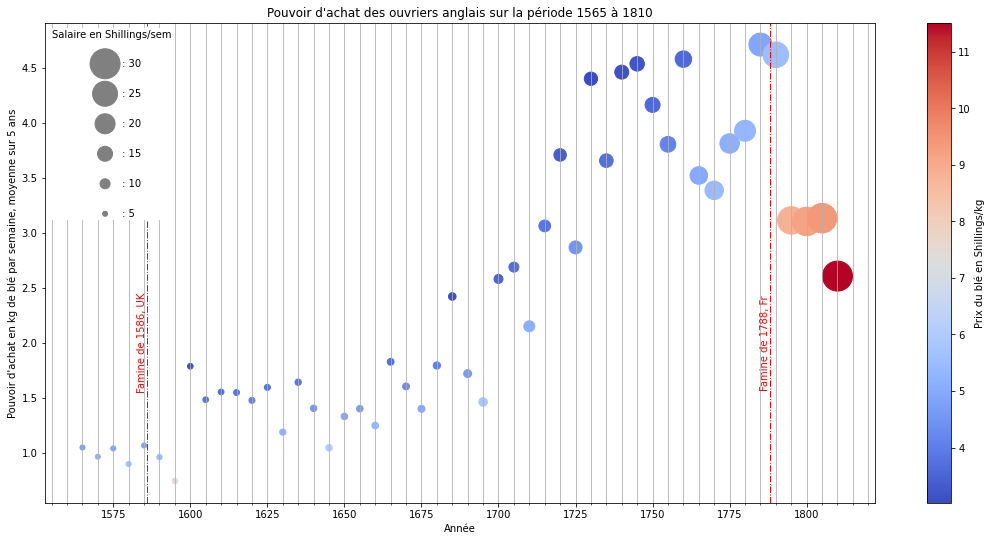

In [17]:
# === tracé de la figure === #
fig6, ax61 = plt.subplots(1,1)
fig6.set_size_inches(2.54*6, 2.54*3)

# add a spine to scatter to ease reading of each year
# ax61.step(data_by_year.index, data_by_year['Purchpower'], linestyle='--', color='lightgrey', where='post', marker=None)

# main data scatter plot with size and color link with variables
myScat6 = ax61.scatter(data_by_year.index, data_by_year['Purchpower'], 
                       c=data_by_year['Wheat'], s=data_by_year['Wages']**2, cmap='coolwarm')
cbar = fig6.colorbar(myScat6)
cbar.ax.set_ylabel("Prix du blé en Shillings/kg")

ax61.set_title("Pouvoir d'achat des ouvriers anglais sur la période 1565 à 1810")
ax61.set_xlabel("Année")
ax61.set_ylabel("Pouvoir d'achat en kg de blé par semaine, moyenne sur 5 ans")

ax61.xaxis.set_major_locator(MultipleLocator(25))
ax61.xaxis.set_minor_locator(MultipleLocator(5))

ax61.grid(True, which='both', axis='x')

plt.tight_layout()

# wages legend = size of each circle
# add above all an inset axe (do it at the end otherwise, layout not compatible)
axins62 = inset_axes(ax61, width="15%", height="40%", loc=2)
# no visible axis
for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    axins62.axis[direction].set_visible(False)

wages_levels = np.arange(5, 35, 5)
wages_lx = np.ones(len(wages_levels))*0.5
axins62.scatter(wages_lx, wages_levels, s = wages_levels**2, color='grey')
axins62.set_xlim([0.1,1])
axins62.set_ylim([4, 36])
axins62.text(0.5,0.95,'Salaire en Shillings/sem', transform=axins62.transAxes, horizontalalignment='center')

for cur_wage in wages_levels:
    axins62.text(0.60, cur_wage, ' : ' + str(cur_wage), verticalalignment='center')
    
ax61.axvline(1586, ls='-.', color='r', linewidth=1)
ax61.axvline(1788, ls='-.', color='r', linewidth=1)

# annotations à propos des famines
ax61.text(1586, 2, 'Famine de 1586, UK', rotation=90, verticalalignment='center', horizontalalignment='right', color='r')
ax61.text(1788, 2, 'Famine de 1788, Fr', rotation=90, verticalalignment='center', horizontalalignment='right', color='r')

### Représentation du pouvoir d'achat par Playfair lui même

Dans une [seconde copie][playfair book 2], toujours hébergée par Google, les graphiques apparaissent, mais en faible résolution, sinon en noir et blanc avec un effet de seuil. Cela permet de voir que Playfair a représenté le pouvoir d'achat autrement, le graphique montré au début de cette étude lui permettait de représenter les données ayant conduit au second graphique. Ce graphique est numérisé à la p. 28 du manuscrit.

![Pouvoir d'achat des ouvriers, par Playfair](playfair_purchpower.PNG)

Dans ce graphique, Playfair mélange encore une fois deux unités sur le même axe, à savoir le nombre jour de travail nécessaire pour se payer un boisseau de blé, et le prix en Shilling de ce même boisseau. Son graphique montre clairement que malgré l'augmentation du prix du boisseau de blé, les ouvriers devait travailler mons longtemps qu'auparavant pour l'acheter. Mais la moyenne sur 25 ans gomme les effets des famines comme on peut le voir sur le graphique présenté à la section précédente. Playfair dit lui-même l'avoir fait pour faciliter la lecture du graphique.

[playfair book 2]: https://books.google.fr/books?id=x51hAAAAcAAJ&printsec=frontcover&hl=fr&source=gbs_ge_summary_r&cad=0#v=onepage&q&f=false


## Conclusions et perspectives

Cette exercice est intéressant pour moderniser les représentations historiques des pionniers de la statistique et de la visualisation de données.

Il a été montré qu'une représentation qui sert un objectif, ici la visualisation de l'évolution du pouvoir d'achat, permet de faire parler un jeu de données plus facilement.

Il est donc important de choisir la représentation des informations de manière cohérente avec la question que l'on se pose, et de choisir les modes de représentation adaptées au type des données utilisées.

En perspective, ce graphique peut encore être améliorer avec notamment le remplacement des points par des rectangle de largeur 5 ans, et centrés sur les intervalles de 5 ans et sur la valeur du pouvoir d'achat moyen sur ces 5 ans. La hauteur du rectangle représenterait alors de manière linéaire le salaire moyen hebdomadaire. La couleur serait toujours utilisée pour le prix du blé. De cette manière le lecteur aurait la représentation des grandeurs moyennes. En effet l'utilisation des marches d'escaliers pourraient faire croire à l'utilisation d'une valeur annuelle extrapolée pour tout l'intervalle.

## Commentaires de l'auteur

Il m'a fallu un après-midi et une soirée complète pour arriver à ce résultat, dont je suis très fier :) . J'imagine donc aisément le temps que cela pouvait prendre à Playfair de réaliser ses graphiques à la main.

J'ai beaucoup appris sur `matplotlib` au cours de l'exercice, j'espère que cela servira aussi aux relecteurs de ce travail :). D'ailleurs, si ces relecteurs connaissent des manières plus élégantes de faire les choses avec `matplotlib`, je suis preneur.